# Lab 11: Polynomial regression, and overfitting and underfitting

This lab introduces polynomial regression.  Polynomial regression is similar to linear regression, but the data is modeled with a polynomial equation instead of a line.  Two problems that need to be considered with polynomial regression are overfitting and underfitting, and we will look at ways to detect them, including splitting the data into testing and training data. 

We will use simulated data for the first part of this lab to be able to easily illustrate different over- and under-fitting scenarios.  We will apply polynomial regression to a real world data set in the final section of this lab.

### Section 1: Simulate the data

First import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

Recall that a polynomial equation has the form
$$y = c_nx^n + c_{n-1}x^{n-1} + ... + c_3x^3 + c_2x^2 + c_1x + c_0$$
where the $c_i$'s are the *coefficients*, which are real numbers.

The highest exponent is the *degree* of the polynomial.

For example, $y = -4x^2 +3x -5$ is a degree 2 polynomial and a parabola:

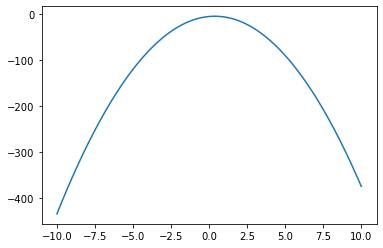

In [2]:
x = np.linspace(-10,10,100)
y = -4*x**2 + 3*x - 5
plt.plot(x,y)

In the above code, how did we compute $x^2$?

The equation $$y = 2x^3 +3x^2 + 7x - 1.2$$ is a degree 3 polynomial:

In [ ]:
x = np.linspace(-10,10,100)
y = 2*x**3 + 3*x**2 +7*x - 1.2
plt.plot(x,y)

A degree 1 polynomial, like $y = 4.3x -2$, is a line:

In [ ]:
x = np.linspace(-10,10,100)
y = 4.3*x - 2
plt.plot(x,y)

We will now simulate some data, which will we store in the DataFrame `df`.  Run the code below to do this.  It is ok if you do not understand this code.

In [ ]:
# number of data points
n = 30

# variance of noise added to data
noise_std = 0.3

x_data = np.linspace(-5, 5, n)

# define a function relating input to output
f = lambda x: 0.1 * x**2

# generate noisy data from the function

y_data = f(x_data) + np.random.normal(0, noise_std, n)

data = {"x": x_data, "y": y_data}
df = pd.DataFrame(data)
df.head()

Plot a scatterplot of the simulated data.

What shape does the simulated data have?  Would linear regression be a good model to use?  Why or why not?

### Section 2: Polynomial regression

Our simulated data has a parabolic shape to it, so let's try modeling it with a degree 2 polynomial.

First we need to take our `x` column and square it (or raise it to the power 2):  

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(df[["x"]])

Notice that we use `df[["x"]]` instead of `df["x"]` because we need to pass a DataFrame into the `fit_transform` function instead of a Series.  

Display the new variable `x_poly`:  

The original x values are in the middle column.  How were the first and third columns computed?

The first column is $x^0 = 1$ for all values of $x$.  The third column is $x^2$.

Now we create a new `LinearRegression` object.  Why linear regression if we are doing polynomial regression?  Because polynomial regression is just linear regression with the independent variables raised to different powers!

In [ ]:
model = LinearRegression()

Next we use fit the model to the data.

In [ ]:
model.fit(x_poly, df["y"])

And then use the fitted model to predict the y values, so we can compare them with the true y values.

In [ ]:
y_pred = model.predict(x_poly)

Replot the scatterplot of the original simulated data.  Then add the following line of code to also plot the degree 2 polynomial model we just fitted:
`plt.plot(df["x"],y_pred)`

Do you think this model fits the data well?  Would you trust predictions made by this model?  Why or why not?

Compute the Mean Squared Error (MSE) between the true y values and the predicted y values.

<details><summary>Answer:</summary>
    <code>mean_squared_error(df["y"], y_pred)</code>
</details>

### Section 3: Under-fitting

By itself the mean squared error is hard to interpret.  But let's compare it to the mean squared error when we fit a line (aka do linear regression) to the data.

Use scikit-learn to fit a linear regression model (degree 1 polynomial) to our simulated data, and predict the y values.  

Hint 1:  See Section 5 of Lab 8.

Hint 2:  As above, use `df[["x"]]` for the x data and `df["y"]` for the y data.

<details><summary>Answer:</summary>
<code>
linear_regressor = LinearRegression()
linear_regressor.fit(df[["x"]],df["y"])
y_linear_pred = linear_regressor.predict(df[["x"]])
</code></details>

Plot this linear model on a scatterplot of the data.

<details><summary>Answer:</summary>
<code>
sns.relplot(x = "x", y = "y", data = df)
plt.plot(df["x"],y_linear_pred)
</code></details>

How well does this linear model fit the data?  Which is a better model - the linear one or the degree 2 polynomial one?

Do you think the mean squared error for this linear model will be higher or lower than the mean squared error for the degree 2 polynomial model?  Compute the mean squared error for the linear model to check.

The mean squared error is a lot higher.  This is because the linear model *underfits* the data, meaning the model is too simple compared to the data. The linear model is not capturing the curve of the data.

### Section 4: Over-fitting

Every time we increase the degree of a polynomial, we can get another curve in its plot.  That is, the higher the degree of a polynomial, the curvier its plot can be.  We might think a higher degree polynomial model is better, because we have more flexibility to capture the trends in the data.  But with a higher degree polynomial we can have *over-fitting*, which occurs when the model is more complex than it needs to be.  In this case, the model will be reacting to random variation in the data, which we should ignore.

Let's see an example of over-fitting.  First, create a degree 10 polynomial model for our data and make the predictions.

In [ ]:
polynomial_features= PolynomialFeatures(degree=10)
x_poly10 = polynomial_features.fit_transform(df[["x"]])

model = LinearRegression()
model.fit(x_poly10, df["y"])
y_poly10_pred = model.predict(x_poly10)

Next, plot the predicted model on the scatterplot of the data.

<details><summary>Answer:</summary>
<code>
sns.relplot(x = "x", y = "y", data = df)
plt.plot(df["x"],y_poly10_pred)
</code>
</details>

How does the degree 10 polynomial model compare to the degree 2 polynomial model?  Which do you think is better?

Finally, compute the mean squared error for this model.

<details><summary>Answer:</summary>
<code>
mean_squared_error(y, y_poly10_pred)
</code>
</details>

The degree 10 polynomial model has a lower mean squared error than either the linear or degree 2 polynomial model, so we might think it's the best.  But we are computing the mean squared error using the same data we trained our model with.  Instead, let's generate some new data from the same population (distribution) as the original data to test our model on.

In [ ]:
# number of data points
n = 30

# variance of noise added to data
noise_std = 0.3

x_data = np.linspace(-5, 5, n)

# define a function relating input to output
f = lambda x: 0.1 * x**2

# generate noisy data from the function

y_data = f(x_data) + np.random.normal(0, noise_std, n)

data = {"x": x_data, "y": y_data}
df_test = pd.DataFrame(data)
df_test.head()

Create the required powers of x for the test data and make predictions with it.

In [ ]:
x_test_poly10 = polynomial_features.fit_transform(df_test[["x"]])

y_test_pred = model.predict(x_test_poly10)

What is the mean squared error for these predictions?

<details><summary>Answer:</summary>
<code>
mean_squared_error(df_test['y'], y_test_pred)
</code>
</details>

What happened to the mean squared error on the test data compared to when we made predictions on the original data?

Plot the model predictions on the scatterplot of the test data

In [ ]:
sns.relplot(x = "x", y = "y", data = df_test)
plt.plot(df["x"],y_test_pred)

<details><summary>Answer:</summary>
<code>
sns.relplot(x = "x", y = "y", data = df_test)
plt.plot(df["x"],y_test_pred)
</code>
</details>

Notice that the solid line representing the model is the same as the previous scatterplot, but the data points have changed position.  This is because we are using the same model, but on new data.  We can see the model doesn't fit this new data as well.

This is an example of overfitting, because the equations for the lines are more complex than they need to be.  An over-fitted model does not handle new data as well, because it is trying to capture random variations in the data it was fit on, rather than only trying to capture the overall trend of the data.

Since our data was simulated, we could just simulate more data to test the model on.  In the next lab, we will see how to split a data set (that cannot be easily increased) into training and testing data.

### Section 5:  Polynomial regression on real data

Let's apply polynomial regression to a real (not simulated) data set.  The following data set was downloaded from Kaggle [here](https://www.kaggle.com/aungpyaeap/fish-market) and is based on measurements of 159 fish caught from the same lake (Laengelmavesi) near Tampere, Finland.  The data was originally gathered in 1917.

Data URL:  [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Fish.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Fish.csv)

First, load the data into a DataFrame called `fish`.

Plot a scatterplot with the length of the fish from nose to the beginning of the tail (Length1 column) on the x axis and the weight of the fish on the y axis.  Color the scatterplot by the fish species.

What do you notice about the plot?  What is the relationship between weight and length1?

#### Section 4.1:  Linear regression model for fish data

Use scikit-learn to compute a linear regression model of this relationship (so predicting weight from length1). 

Use your linear regresison model to predict the weight for all fish using just their length1 measurement.

Plot your linear regression model line on the lenght1 vs. weight scatterplot.

Compute the mean squared error of these predictions.

Do you think the linear model is a good fit for the data?

Now we will compare the linear model to a degree 2 polynomial model.

#### Section 4.2: Polynomial regression model for fish data

First, create a polynomial regression model of degree 2 to fit the data.

Use this polynomial regresison model to predict the weight for all fish using just their length1 measurement.

If we plot the degree 2 polynomial regression model using `plt.plot()` we will get zig-zagging lines because it plots the points in the order they are the data set.  We can fix this either by sorting first, or just use the `regplot()` function in Seaborn with the parameter `order = 2`, to indicate the regression line should be a degree 2 polynomial.

Compute the mean squared error of these predictions.

Which model is better:  the linear regression or degree 2 polynomial regression model?  Why?